<a href="https://colab.research.google.com/github/AzisilhamK463/MachineLearning2023/blob/main/kuis1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuis 1 Machine Learning

Nama : Azis Ilham Kurniawan

Kelas : TI - 3F

NIM : 2141720145

# **Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST**

**Deskripsi Umum**

Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

**Tentang Dataset MNIST**

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

**Detail Kuis**

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

  - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
  - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

  - Anda diperbolehkan untuk melakukan tunning parameter.
  - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.

  - Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
  - Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
  - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

In [7]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [9]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# **Nomer 1**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
label_counts = np.bincount(mnist.target.astype(int))

In [12]:
for index, value in enumerate(label_counts):
    print(f'nilai {index} = {value}')

nilai 0 = 6903
nilai 1 = 7877
nilai 2 = 6990
nilai 3 = 7141
nilai 4 = 6824
nilai 5 = 6313
nilai 6 = 6876
nilai 7 = 7293
nilai 8 = 6825
nilai 9 = 6958


Ada sedikit data imbalance namun tidak terlalu banyak. dikarenakan selisih dari data mayoritas dan data minoritas tidak terlalu jauh jika dibandingkan dengan jumlah data dan rata-rata data pada tiap label.

#**Nomer 2**

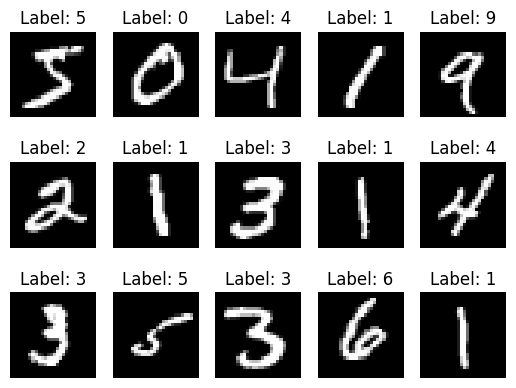

In [13]:
images = mnist.data
labels = mnist.target.astype(int)

num_images_to_display = 15

for i in range(num_images_to_display):
    plt.subplot(3, 5, i + 1)
    image = images.iloc[i].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()

#**Nomer 3**

In [14]:
from sklearn.decomposition import PCA

In [15]:
X=mnist.data.astype('float64')
y = mnist.target

# standarisasi data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std + 1e-8)


n_components = 50
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

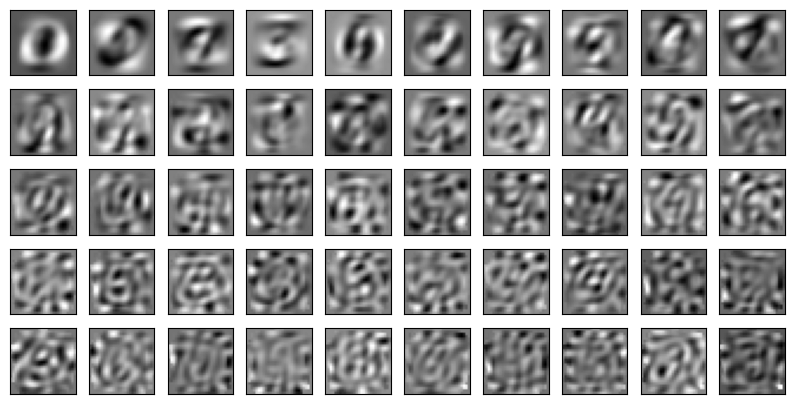

In [16]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

#**Nomer 4**

In [17]:
X=mnist.data.astype('float64')
y = mnist.target

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=100)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=100)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=100)

#**Nomer 5**

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# klasifikasi algoritma SVM
# Inisiasi SVM
svm = SVC(kernel='rbf', C=1.0)

# fit model
svm.fit(X_train, y_train)

# prediksi dengan data training
train_preds_svm = svm.predict(X_train)

# prediksi dengan data testing
test_preds_svm = svm.predict(X_test)


# klasifikasi algoritma Naive Bayes
# Inisiasi GaussianNB
nb = GaussianNB()

# fit model
nb.fit(X_train, y_train)

# prediksi dengan data training
train_preds_nb = nb.predict(X_train)

# prediksi dengan data testing
test_preds_nb = nb.predict(X_test)

#**Nomer 6**

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

**Algoritma SVM**

In [26]:
# evaluasi akurasi data train SVM
train_accuracy_svm = accuracy_score(y_train, train_preds_svm)
# evaluasi akurasi data test SVM
test_accuracy_svm = accuracy_score(y_test, test_preds_svm)

# classification report
train_report_svm = classification_report(y_train, train_preds_svm)
test_report_svm = classification_report(y_test, test_preds_svm)

print("Train Accuracy ", train_accuracy_svm)
print("Test Accuracy ", test_accuracy_svm)
print("Train Classification Report ")
print(train_report_svm)
print("Test Classification Report")
print(test_report_svm)

Train Accuracy  0.9901587301587301
Test Accuracy  0.9815714285714285
Train Classification Report 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6202
           1       0.99      0.99      0.99      7085
           2       0.99      0.99      0.99      6277
           3       0.99      0.99      0.99      6426
           4       0.99      0.99      0.99      6126
           5       0.99      0.99      0.99      5683
           6       0.99      1.00      1.00      6186
           7       0.99      0.99      0.99      6569
           8       0.99      0.99      0.99      6186
           9       0.99      0.98      0.98      6260

    accuracy                           0.99     63000
   macro avg       0.99      0.99      0.99     63000
weighted avg       0.99      0.99      0.99     63000

Test Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       701
       

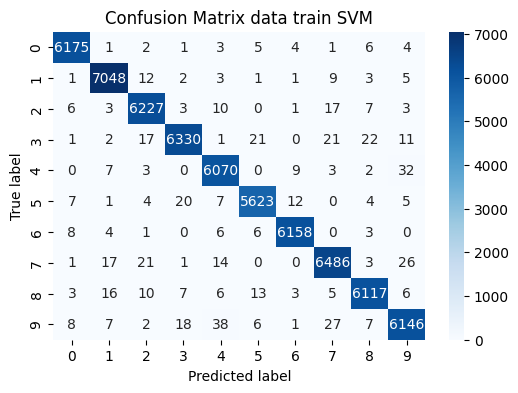

[[6175    1    2    1    3    5    4    1    6    4]
 [   1 7048   12    2    3    1    1    9    3    5]
 [   6    3 6227    3   10    0    1   17    7    3]
 [   1    2   17 6330    1   21    0   21   22   11]
 [   0    7    3    0 6070    0    9    3    2   32]
 [   7    1    4   20    7 5623   12    0    4    5]
 [   8    4    1    0    6    6 6158    0    3    0]
 [   1   17   21    1   14    0    0 6486    3   26]
 [   3   16   10    7    6   13    3    5 6117    6]
 [   8    7    2   18   38    6    1   27    7 6146]]


In [27]:
# confusion matrix untuk data train svm
train_confusion_matrix_svm = confusion_matrix(y_train, train_preds_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data train SVM')
plt.show()
print(train_confusion_matrix_svm)

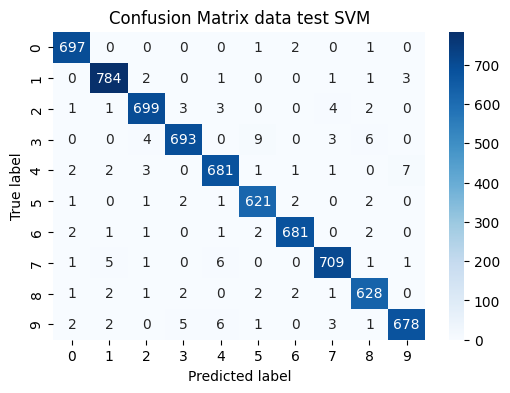

[[697   0   0   0   0   1   2   0   1   0]
 [  0 784   2   0   1   0   0   1   1   3]
 [  1   1 699   3   3   0   0   4   2   0]
 [  0   0   4 693   0   9   0   3   6   0]
 [  2   2   3   0 681   1   1   1   0   7]
 [  1   0   1   2   1 621   2   0   2   0]
 [  2   1   1   0   1   2 681   0   2   0]
 [  1   5   1   0   6   0   0 709   1   1]
 [  1   2   1   2   0   2   2   1 628   0]
 [  2   2   0   5   6   1   0   3   1 678]]


In [28]:
# confusion matrix untuk data test svm
test_confusion_matrix_svm = confusion_matrix(y_test, test_preds_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data test SVM')
plt.show()
print(test_confusion_matrix_svm)

**Algoritma Naive Bayess**

In [29]:
# evaluasi akurasi data train NB
train_accuracy_nb = accuracy_score(y_train, train_preds_nb)
# evalasi akurasi data test NB
test_accuracy_nb = accuracy_score(y_test, test_preds_nb)

# classification_report
train_report_nb = classification_report(y_train, train_preds_nb)
test_report_nb = classification_report(y_test, test_preds_nb)

print("Train Accuracy ", train_accuracy_nb)
print("Test Accuracy ", test_accuracy_nb)
print("Train Classification Report ")
print(train_report_nb)
print("Test Classification Report")
print(test_report_nb)

Train Accuracy  0.5582380952380952
Test Accuracy  0.5557142857142857
Train Classification Report 
              precision    recall  f1-score   support

           0       0.77      0.87      0.81      6202
           1       0.79      0.95      0.86      7085
           2       0.88      0.31      0.46      6277
           3       0.77      0.32      0.45      6426
           4       0.83      0.16      0.27      6126
           5       0.64      0.04      0.08      5683
           6       0.63      0.94      0.76      6186
           7       0.91      0.30      0.45      6569
           8       0.29      0.68      0.40      6186
           9       0.39      0.94      0.55      6260

    accuracy                           0.56     63000
   macro avg       0.69      0.55      0.51     63000
weighted avg       0.69      0.56      0.52     63000

Test Classification Report
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       701
       

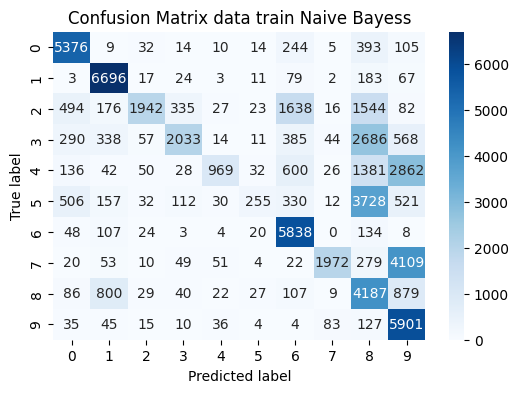

[[5376    9   32   14   10   14  244    5  393  105]
 [   3 6696   17   24    3   11   79    2  183   67]
 [ 494  176 1942  335   27   23 1638   16 1544   82]
 [ 290  338   57 2033   14   11  385   44 2686  568]
 [ 136   42   50   28  969   32  600   26 1381 2862]
 [ 506  157   32  112   30  255  330   12 3728  521]
 [  48  107   24    3    4   20 5838    0  134    8]
 [  20   53   10   49   51    4   22 1972  279 4109]
 [  86  800   29   40   22   27  107    9 4187  879]
 [  35   45   15   10   36    4    4   83  127 5901]]


In [30]:
# confusion matrix untuk data train nb
train_confusion_matrix_nb = confusion_matrix(y_train, train_preds_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data train Naive Bayess')
plt.show()
print(train_confusion_matrix_nb)

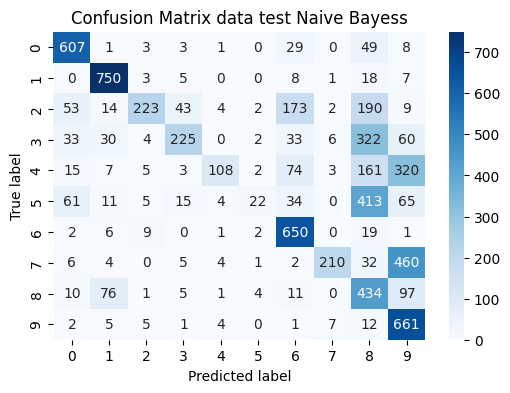

[[607   1   3   3   1   0  29   0  49   8]
 [  0 750   3   5   0   0   8   1  18   7]
 [ 53  14 223  43   4   2 173   2 190   9]
 [ 33  30   4 225   0   2  33   6 322  60]
 [ 15   7   5   3 108   2  74   3 161 320]
 [ 61  11   5  15   4  22  34   0 413  65]
 [  2   6   9   0   1   2 650   0  19   1]
 [  6   4   0   5   4   1   2 210  32 460]
 [ 10  76   1   5   1   4  11   0 434  97]
 [  2   5   5   1   4   0   1   7  12 661]]


In [31]:
# confusion matrix untuk data test nb
test_confusion_matrix_nb = confusion_matrix(y_test, test_preds_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data test Naive Bayess')
plt.show()
print(test_confusion_matrix_nb)

#**Nomer 7**

In [32]:
def show_images_with_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)

    fig, axes = plt.subplots(3, 5, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test.iloc[i]}\nPred: {predictions[i]}")
        ax.axis('off')
    plt.tight_layout()

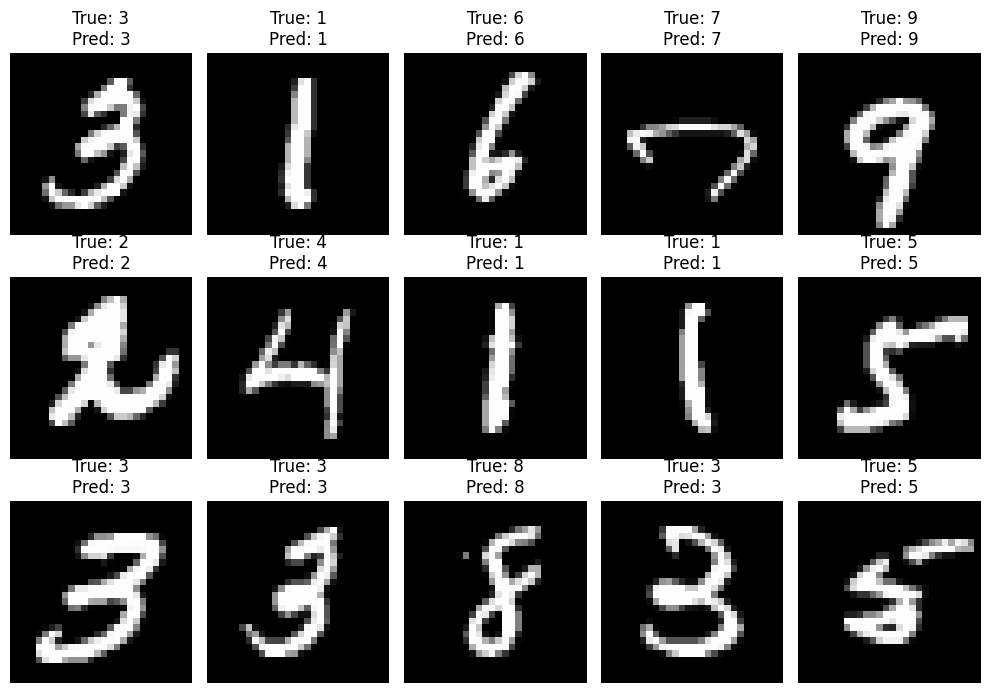

In [33]:
# menampilkan citra data testing algoritma SVM
show_images_with_predictions(svm, X_test, y_test)

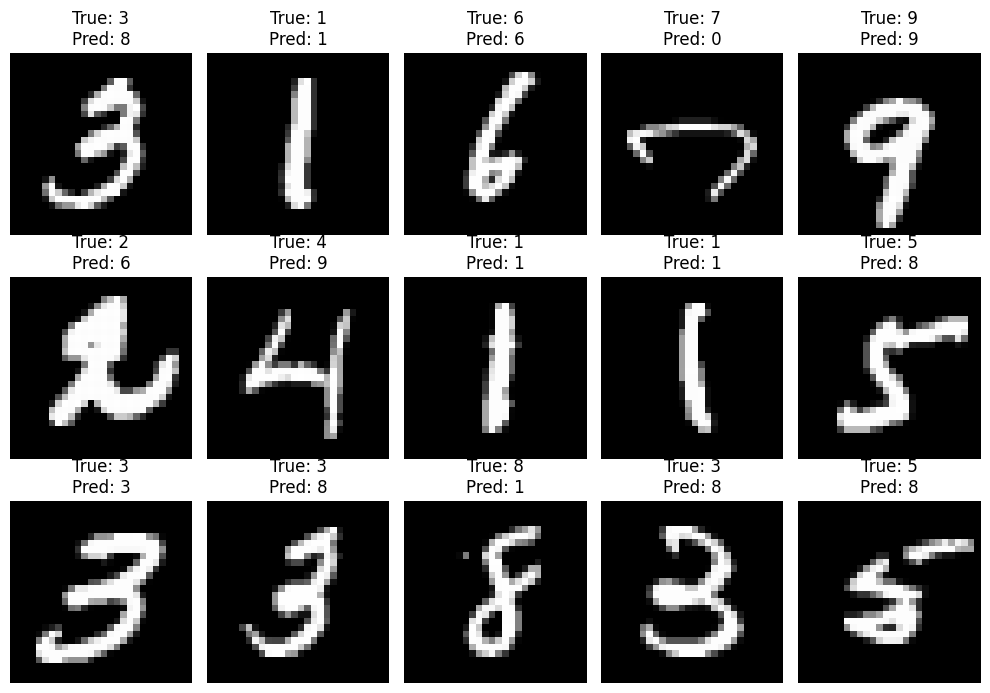

In [34]:
# menampilkan citra data testing algoritma Naive Bayess
show_images_with_predictions(nb, X_test, y_test)

#**Nomer 8**

In [35]:
svm_accuracy = accuracy_score(y_test, test_preds_svm)
nb_accuracy = accuracy_score(y_test, test_preds_nb)

print(f'Akurasi SVM: {svm_accuracy * 100:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy * 100:.2f}%')

Akurasi SVM: 98.16%
Akurasi Naive Bayes: 55.57%
